In [1]:
def DataExploration():
    "This function can be used to explore the CustomerCombinedFinal data file. The function will help the user upload the data before prompting exploration. The user is able to add their own inputs in order to look the relationship between two variables of their choice or to see a bar graph of the categorical variable of their choice. It also allows users to see the answer to three previously completed analyses about the data set"
    # Import Libraries
    import pandas as pd
    import numpy as np
    from pandas import DataFrame, Series
    import matplotlib.pyplot as plt
    %matplotlib inline
    import seaborn as sns
    import os
    import datetime
    from datetime import datetime
    import math
    print("Today we will be uploading and analyzing customer data from a store")
    print("The dataset contains information about the customer such as their birth year, marital status, income, if they have kids, and information about their shopping habits such as spend in various categories and shopping location (in store, online, catalog). It also contains information about if they used any coupons from marketing campaigns") 
    x = os.getcwd()
    DataUpload = "No"
    while DataUpload == "No":
        CurrentDirectory = input(f"Is your CustomerCombinedFinal file saved in {x}? Yes or No")
        if CurrentDirectory == "Yes":
            CustomerCombined = pd.read_csv('CustomerCombinedFinal.csv')
            DataUpload = "Yes"
        elif CurrentDirectory == "No":
            CorrectDirectory = input("Enter the file path to the folder they are saved in then:")
            CustomerCombined = pd.read_csv(os.path.join(CorrectDirectory,'CustomerCombinedFinal.csv'))
            DataUpload = "Yes"
        else:
            print("Unable to understand response. Please enter Yes or No")
    print("Now that the data is uploaded, what do you want to explore?")
    explore = "Yes"
    while explore == "Yes":
        print("1. Check the relationship between your choice of 2 variables by looking at the scatterplot and correlation coefficient")
        print("2. Check the bar graph of a categorical variable")
        print("3. Do those that have children spend more total than those that don't? Does it vary based on if they have kids or teens?")
        print("4. Do those who visit the website more order online more? Do they spend more in general?")
        print("5. How does wine spend vary by marital status? How does wine spend vary by number of children? Can you look at wine spend compared to both factors?")
        option = input("Enter the number of the item above that you wish to explore:")
        if option == "1":
            columns = CustomerCombined.dtypes
            print(f"These are the variables and their data types that we have in out data: {columns}")
            var1, var2 = input("Keeping in mind the data types, which two variables would you like to see the relationship between? Enter the exact column names separated by a comma").split(', ')
            x = var1
            y = var2
            sns.scatterplot(x=x, y=y, data=CustomerCombined)
            plt.show()
            correlation = CustomerCombined[x].corr(CustomerCombined[y])
            print(f"The correlation between {x} and {y} is {correlation:.4f}")
            print(" ")
            explore = input("Do you want to explore more? Yes or No")
        elif option == "2":
            CategoricalVariables = CustomerCombined.select_dtypes(include=['bool','object','int64'])
            # althought int64 data type doesn't seem categorical, some variables like Kidhome, Teenhome, NumDealsPurchases etc don't have very many different numbers and could be viewed as categories
            # creating filter to only be able to look at variables with less than 15 unique values
            for col in CategoricalVariables.columns:
                if len(CategoricalVariables[col].unique()) > 15:
                    CategoricalVariables.drop(col,inplace=True,axis=1)
            print(f'Here are the variables you can create a bar graph of: {CategoricalVariables.columns}')
            x = input("Put column name to see bar chart")
            sns.countplot(x=x, data=CategoricalVariables, palette='muted')
            plt.show()
            print(" ")
            explore = input("Do you want to explore more? Yes or No") 
        elif option == "3":
            sns.boxplot(x='TotalChildren',y='TotalSpend',data=CustomerCombined, palette='muted')
            plt.show()
            print("It actually appears that those who have children spend less. For those with 0 children, the mean is above the 75% quartile line for all children counts.")
            print("Does this change at all if you factor in wether the children are kids or teens?")
            fig, ax = plt.subplots(figsize=(12,7), nrows = 1, ncols = 2)
            ax = ax.flatten()
            sns.boxplot(x='Kidhome',y='TotalSpend',data=CustomerCombined, ax=ax[0], palette='muted')
            sns.boxplot(x='Teenhome',y='TotalSpend',data=CustomerCombined, ax=ax[1], palette='muted')
            plt.show()
            print("When looking at it broken down by kid vs teen, the box plots show that customers who have kids at home typically spend less than those without kids and those with teenagers.")
            print("Conclusion: Overall, customers without children spend more than those with children. But when you break it down by those who have kids vs those who have teens, customers with kids spend much less than those with no children and those with teens. When looking at both kids or teens, customers spend very similarily regardless of if they have 1 or 2 kids/teens. Customers who have teens have a median spend that is very similar to customers without children, but the range of spends is much large for customers with no children so their spend can get higher. ")
            print(" ")
            explore = input("Do you want to explore more? Yes or No")
        elif option == "4":
            sns.scatterplot(x='NumWebVisitsMonth', y='NumWebPurchases', data=CustomerCombined)
            plt.show()
            WebCorrelation = CustomerCombined.NumWebPurchases.corr(CustomerCombined.NumWebVisitsMonth)
            print(f'The correlation coefficient for Number of Web Purchases and Number of Web Visits per Month is {WebCorrelation:.4f}')
            print("There does not seem to be a correlation between visiting the website and number of web purchases. Let's look at if there is a relationship between TotalSpend and Website Visits, as maybe customers are browsing the site before going to the store?")
            sns.scatterplot(x='NumWebVisitsMonth', y='TotalSpend', data=CustomerCombined)
            plt.show()
            WebSpendCorrelation = CustomerCombined.NumWebPurchases.corr(CustomerCombined.NumWebVisitsMonth)
            print(f'The correlation coefficient for Number of Web Visits per Month and Total Spend is {WebSpendCorrelation:.4f}')
            print("There also does not seem to be a correlation between website visits per month and total spend.")
            print('Conculsion: Website visits per month does not have a strong correlation with either Number of Web Purchases or Total Spend.') 
            print(" ")
            explore = input("Do you want to explore more? Yes or No")
        elif option == "5": 
            grouped = CustomerCombined.MntWines.groupby(CustomerCombined.Marital_Status)
            print('Mean spend by Marital Status')
            print(grouped.mean())            
            sns.boxplot(y='MntWines', data=CustomerCombined, x='Marital_Status', palette='muted')
            plt.title('Wine Spend variations by Marital Status')
            plt.show()
            print("There is not much variation on wine spend between the different Marital Status'")
            print(" ")
            grouped = CustomerCombined.MntWines.groupby(CustomerCombined.TotalChildren)
            print('Mean spend by Number of Children')
            print(grouped.mean())
            sns.boxplot(y='MntWines', data=CustomerCombined, x='TotalChildren', palette='muted')
            plt.title('Wine Spend variations by Number of Children')
            plt.show()
            print("There is more variation in spend on win when you break it down by the number of children the customer has. Thoes with no children spend the most on wine. This makes sense as it aligns with our discovery from Q1 that customers with no children are more likely to spend the most. Spend on wine continues to decrease as the number of children increase. The only caveat to this is that the mean spend on wine for customers with 3 children is higher than the mean spend on wine for customers with 2 children, but the 75th percentile line for customers with 3 children is lower than it is for customers with 2 children. This shows that while the mean is slightly higher for customers with 3 children, that the range of spends for 3 children is smaller than the range of spends for 2 children.")
            print(" ")
            means = CustomerCombined.MntWines.groupby([CustomerCombined.Marital_Status, CustomerCombined.TotalChildren]).mean()
            print(means)
            df_means = DataFrame(means)
            df_means = df_means.unstack(level=0)
            sns.heatmap(df_means, cmap="Blues")
            plt.xlabel('Marital Status')
            plt.ylabel('Number of Children')
            plt.title('Wine spend by Marital Status & Count of Children')
            plt.show()
            print("Conclusion: This heat map combines our findings from the last two box plots. The dark blues mean more was spent on wine, compared to the light blues. The fact that the top row where number of children is 0 is dark blue across all marital status options reiterates that have 0 children has a larger effect on wine spend that any of our marital status options.")
            print(" ")
            explore = input("Do you want to explore more? Yes or No")
        else: 
            print("Unable to understand response. Please enter a number from the list")
    return f"Thanks for exploring our data"

Today we will be uploading and analyzing customer data from a store
The dataset contains information about the customer such as their birth year, marital status, income, if they have kids, and information about their shopping habits such as spend in various categories and shopping location (in store, online, catalog). It also contains information about if they used any coupons from marketing campaigns


Is your CustomerCombinedFinal file saved in C:\Users\Nicole Eberle\OneDrive - University of Denver\Documents\Job Search Fall 2023\GitHub\Data Exploration - Python? Yes or No Yes


Now that the data is uploaded, what do you want to explore?
1. Check the relationship between your choice of 2 variables by looking at the scatterplot and correlation coefficient
2. Check the bar graph of a categorical variable
3. Do those that have children spend more total than those that don't? Does it vary based on if they have kids or teens?
4. Do those who visit the website more order online more? Do they spend more in general?
5. How does wine spend vary by marital status? How does wine spend vary by number of children? Can you look at wine spend compared to both factors?


Enter the number of the item above that you wish to explore: 1


These are the variables and their data types that we have in out data: Unnamed: 0                int64
ID                        int64
Year_Birth                int64
Marital_Status           object
Income                  float64
Kidhome                   int64
Teenhome                  int64
Dt_Customer              object
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
AcceptedCmp1               bool
AcceptedCmp2               bool
AcceptedCmp3               bool
AcceptedCmp4               bool
AcceptedCmp5               bool
AcceptedCmp6               bool
TotalChildren             int64
TotalSpend                int64
TotalPurchases            int64
TotalOffersAccepted       int64
A

Keeping in mind the data types, which two variables would you like to see the relationship between? Enter the exact column names separated by a comma MntMeatProducts, MntFishProducts


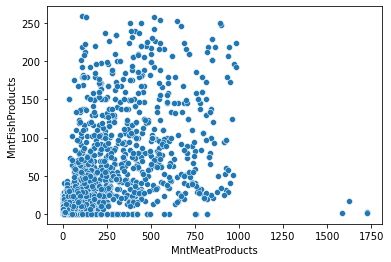

The correlation between MntMeatProducts and MntFishProducts is 0.5724
 


Do you want to explore more? Yes or No Yes


1. Check the relationship between your choice of 2 variables by looking at the scatterplot and correlation coefficient
2. Check the bar graph of a categorical variable
3. Do those that have children spend more total than those that don't? Does it vary based on if they have kids or teens?
4. Do those who visit the website more order online more? Do they spend more in general?
5. How does wine spend vary by marital status? How does wine spend vary by number of children? Can you look at wine spend compared to both factors?


Enter the number of the item above that you wish to explore: 2


C:\Users\Nicole Eberle\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Here are the variables you can create a bar graph of: Index(['Marital_Status', 'Kidhome', 'Teenhome', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6', 'TotalChildren',
       'TotalOffersAccepted', 'WebsiteVisitQuartile', 'AgeBin'],
      dtype='object')


Put column name to see bar chart AgeBin


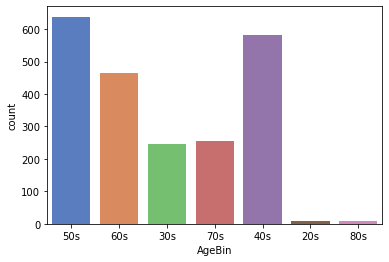

Do you want to explore more? Yes or No Yes


1. Check the relationship between your choice of 2 variables by looking at the scatterplot and correlation coefficient
2. Check the bar graph of a categorical variable
3. Do those that have children spend more total than those that don't? Does it vary based on if they have kids or teens?
4. Do those who visit the website more order online more? Do they spend more in general?
5. How does wine spend vary by marital status? How does wine spend vary by number of children? Can you look at wine spend compared to both factors?


Enter the number of the item above that you wish to explore: 3


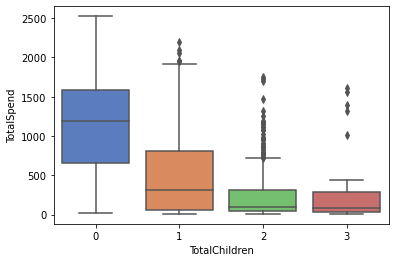

It actually appears that those who have children spend less. For those with 0 children, the mean is above the 75% quartile line for all children counts.
Does this change at all if you factor in wether the children are kids or teens?


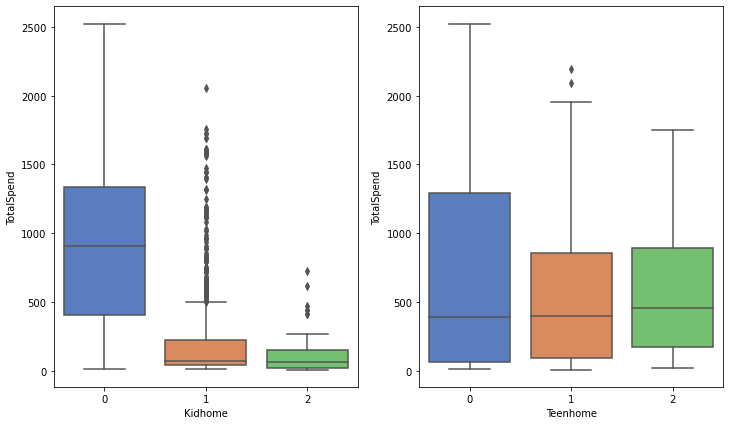

When looking at it broken down by kid vs teen, the box plots show that customers who have kids at home typically spend less than those without kids and those with teenagers.
Conclusion: Overall, customers without children spend more than those with children. But when you break it down by those who have kids vs those who have teens, customers with kids spend much less than those with no children and those with teens. When looking at both kids or teens, customers spend very similarily regardless of if they have 1 or 2 kids/teens. Customers who have teens have a median spend that is very similar to customers without children, but the range of spends is much large for customers with no children so their spend can get higher. 
 


Do you want to explore more? Yes or No Yes


1. Check the relationship between your choice of 2 variables by looking at the scatterplot and correlation coefficient
2. Check the bar graph of a categorical variable
3. Do those that have children spend more total than those that don't? Does it vary based on if they have kids or teens?
4. Do those who visit the website more order online more? Do they spend more in general?
5. How does wine spend vary by marital status? How does wine spend vary by number of children? Can you look at wine spend compared to both factors?


Enter the number of the item above that you wish to explore: 4


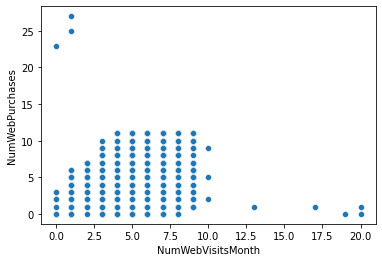

The correlation coefficient for Number of Web Purchases and Number of Web Visits per Month is -0.0430
There does not seem to be a correlation between visiting the website and number of web purchases. Let's look at if there is a relationship between TotalSpend and Website Visits, as maybe customers are browsing the site before going to the store?


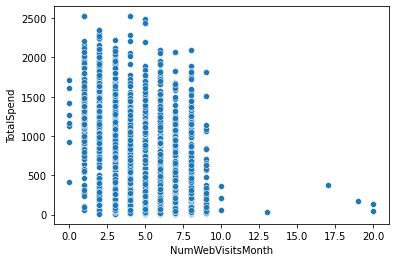

The correlation coefficient for Number of Web Visits per Month and Total Spend is -0.0430
There also does not seem to be a correlation between website visits per month and total spend.
Conculsion: Website visits per month does not have a strong correlation with either Number of Web Purchases or Total Spend.
 


Do you want to explore more? Yes or No Yes


1. Check the relationship between your choice of 2 variables by looking at the scatterplot and correlation coefficient
2. Check the bar graph of a categorical variable
3. Do those that have children spend more total than those that don't? Does it vary based on if they have kids or teens?
4. Do those who visit the website more order online more? Do they spend more in general?
5. How does wine spend vary by marital status? How does wine spend vary by number of children? Can you look at wine spend compared to both factors?


Enter the number of the item above that you wish to explore: 5


Mean spend by Marital Status
Marital_Status
Divorced    330.460526
Married     300.548538
Single      292.260504
Together    308.145359
Widow       367.131579
Name: MntWines, dtype: float64


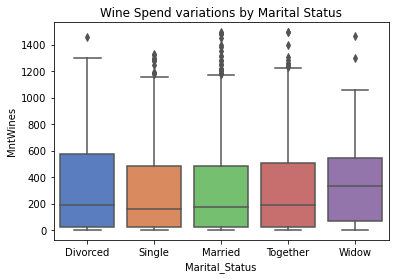

There is not much variation on wine spend between the different Marital Status'
 
Mean spend by Number of Children
TotalChildren
0    490.746815
1    269.451033
2    142.477108
3    161.340000
Name: MntWines, dtype: float64


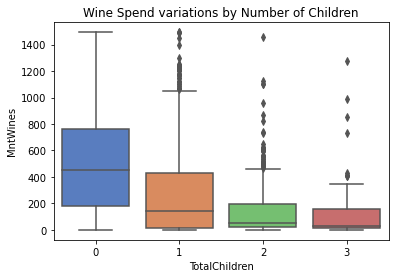

There is more variation in spend on win when you break it down by the number of children the customer has. Thoes with no children spend the most on wine. This makes sense as it aligns with our discovery from Q1 that customers with no children are more likely to spend the most. Spend on wine continues to decrease as the number of children increase. The only caveat to this is that the mean spend on wine for customers with 3 children is higher than the mean spend on wine for customers with 2 children, but the 75th percentile line for customers with 3 children is lower than it is for customers with 2 children. This shows that while the mean is slightly higher for customers with 3 children, that the range of spends for 3 children is smaller than the range of spends for 2 children.
 
Marital_Status  TotalChildren
Divorced        0                469.618182
                1                349.428571
                2                157.530612
                3                 43.000000
Marri

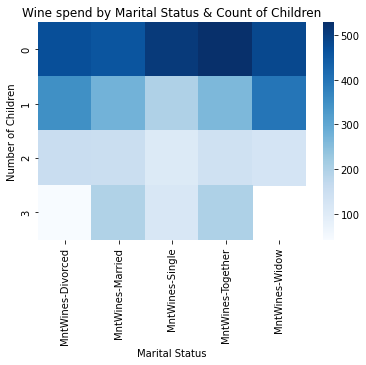

Conclusion: This heat map combines our findings from the last two box plots. The dark blues mean more was spent on wine, compared to the light blues. The fact that the top row where number of children is 0 is dark blue across all marital status options reiterates that have 0 children has a larger effect on wine spend that any of our marital status options.
 


Do you want to explore more? Yes or No No


'Thanks for exploring our data'

In [2]:
DataExploration()